In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/amazon_reviews.csv')

In [ ]:
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
data.shape

(4915, 12)

# 결측 확인

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
reviewerName,1
overall,0
reviewText,1
reviewTime,0
day_diff,0
helpful_yes,0
helpful_no,0
total_vote,0
score_pos_neg_diff,0


# 도움 여부 빈도(분포) 확인

In [ ]:
yes = data['helpful_yes'].value_counts()
no = data['helpful_no'].value_counts()

yes_d = yes.reset_index()
yes_d.columns = ['helpful_yes', 'count']
yes_d
yes_d = yes_d[yes_d['count'] > 5]  # 빈도가 5보다 큰 값만 표시


no_d = no.reset_index()
no_d.columns = ['helpful_no', 'count']
no_d = no_d[no_d['count'] > 5]  # 빈도가 5보다 큰 값만 표시


no_d

,helpful_no,count
0,0,4674
1,1,175
2,2,43
3,3,7


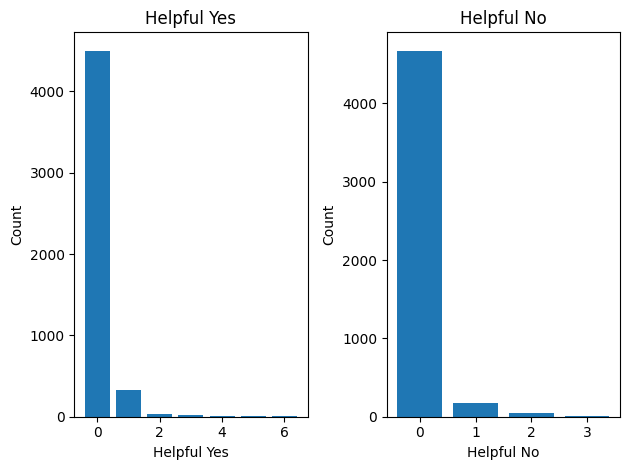

In [ ]:
import matplotlib.pyplot as plt

# 1행 2열의 첫번쨰 subplot
plt.subplot(1,2,1)
plt.bar(yes_d['helpful_yes'], yes_d['count'])
plt.title('Helpful Yes')
plt.xlabel('Helpful Yes')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.bar(no_d['helpful_no'], no_d['count'])
plt.title('Helpful No')
plt.xlabel('Helpful No')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
diff = data['score_pos_neg_diff'].value_counts()
diff = diff.reset_index()
diff = diff[diff['count'] > 5]
diff

,score_pos_neg_diff,count
0,0,4407
1,1,273
2,-1,123
3,2,34
4,-2,22
5,3,11
6,4,9
7,5,8
8,-3,7


Text(0.5, 0, 'score_pos_neg_diff')

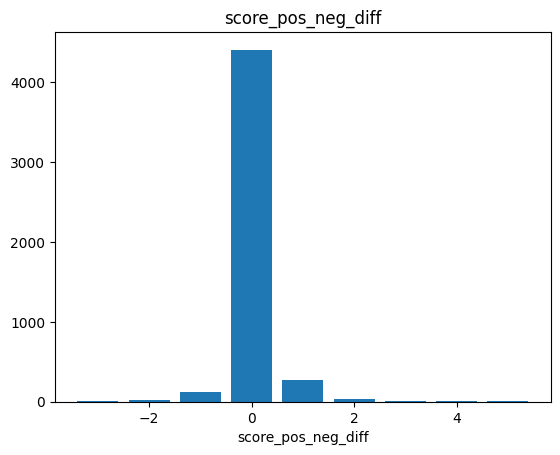

In [ ]:
plt.bar(diff['score_pos_neg_diff'], diff['count'])
plt.title('score_pos_neg_diff')
plt.xlabel('score_pos_neg_diff')

In [ ]:
import matplotlib.pyplot as plt

tempp = data.groupby('senti')['score_pos_neg_diff'].agg(['min', 'max', 'mean'])
tempp.plot(kind='bar')

KeyError: 'senti'

# 길이 확인. 길이와 감성 분류의 관계

In [ ]:
data['reviewLength'] = data['reviewText'].apply(lambda x:len(str(x)))

In [ ]:
length_count = data['reviewLength'].value_counts()
length_count =length_count.reset_index()
length_count.columns = ['reviewLength', 'count']
length_count = length_count.sort_values(by='reviewLength')
length_count = length_count[length_count['count']>20]

length_count

,reviewLength,count
55,96,22
48,97,25
43,98,27
40,99,28
50,100,25
...,...,...
60,157,21
45,158,26
44,159,26
47,161,25


In [ ]:
length_count['reviewLength'].describe()

,reviewLength
count,63.000000
mean,128.317460
std,20.448855
min,96.000000
25%,111.500000
50%,127.000000
75%,144.500000
max,188.000000


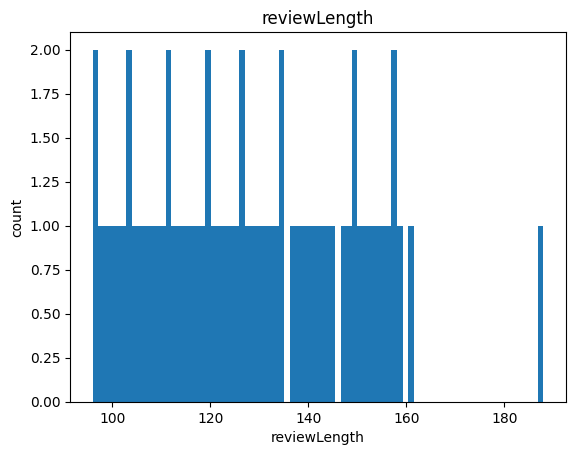

In [ ]:
plt.hist(length_count['reviewLength'], bins=80)
plt.title('reviewLength')
plt.xlabel('reviewLength')
plt.ylabel('count')
plt.show()

In [ ]:
# 감정별 리뷰 길이 분포

In [ ]:
data['senti'] = data['overall'].map({1: 'negative', 2: 'negative', 3:'neutral', 4:'positive',5:'positive'})
data['senti'].value_counts()

,count
senti,
positive,4449
negative,324
neutral,142


In [ ]:
# 그룹별로 리뷰길이에 대한 정보
data.groupby(data['senti'])['reviewLength'].describe()

temp = data.groupby(data['senti'])['reviewLength'].agg(['min', 'max', 'mean'])
temp

,min,max,mean
senti,,,
negative,20,8638,574.731481
neutral,44,3056,390.098592
positive,3,5880,241.426613


<Axes: xlabel='senti'>

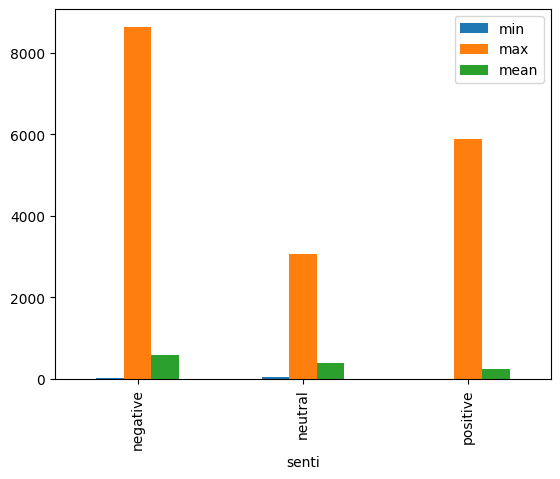

In [ ]:
# 부정적인 리뷰가 리뷰 길이가 더 길다
temp.plot(kind='bar')

Text(0.5, 0, 'senti')

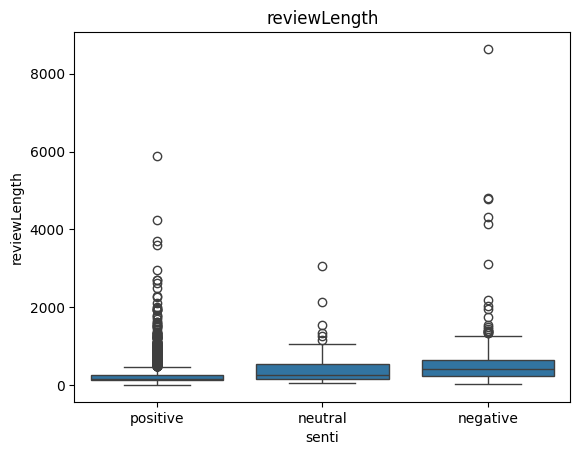

In [ ]:
import seaborn as sns

# 부정적인 리뷰가 리뷰 길이가 더 길다
sns.boxplot(x='senti', y='reviewLength', data=data)
plt.title('reviewLength')
plt.xlabel('senti')

## 감정별 단어분포

In [ ]:

data['reviewText'] = data['reviewText'].fillna('')

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# 각 감성별로 텍스트 데이터를 분리
positive_reviews = data[(data['overall'] == 5) | (data['overall'] == 4)]
negative_reviews = data[(data['overall'] == 1) | (data['overall'] == 2) ]
neutral_reviews = data[data['overall'] == 3]

positive_reviews

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,reviewLength,senti
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,10,positive
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,158,positive
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,166,positive
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,340,positive
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,290,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4909,4909,Zman,5.0,I bought this to stretch the capability of my ...,2014-01-29,313,0,0,0,0,0.0,0.0,156,positive
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,148,positive
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0,233,positive
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,91,positive


In [ ]:
# 벡터화 함수 정의
def get_top_words(reviews, n=20):
    vect = CountVectorizer(stop_words='english', ngram_range=(1,1))  # 단어 빈도 추출
    X = vect.fit_transform(reviews['reviewText'])  # NaN 제거 후 변환
    word_counts = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out()).sum().sort_values(ascending=False)
    return word_counts.head(n)

# 감정별 상위 단어 추출
top_words_positive = get_top_words(positive_reviews)
top_words_neutral = get_top_words(neutral_reviews)
top_words_negative = get_top_words(negative_reviews)


top_words_negative

,0
card,849
sandisk,284
phone,245
cards,151
sd,123
just,119
memory,104
months,104
problem,102
format,102


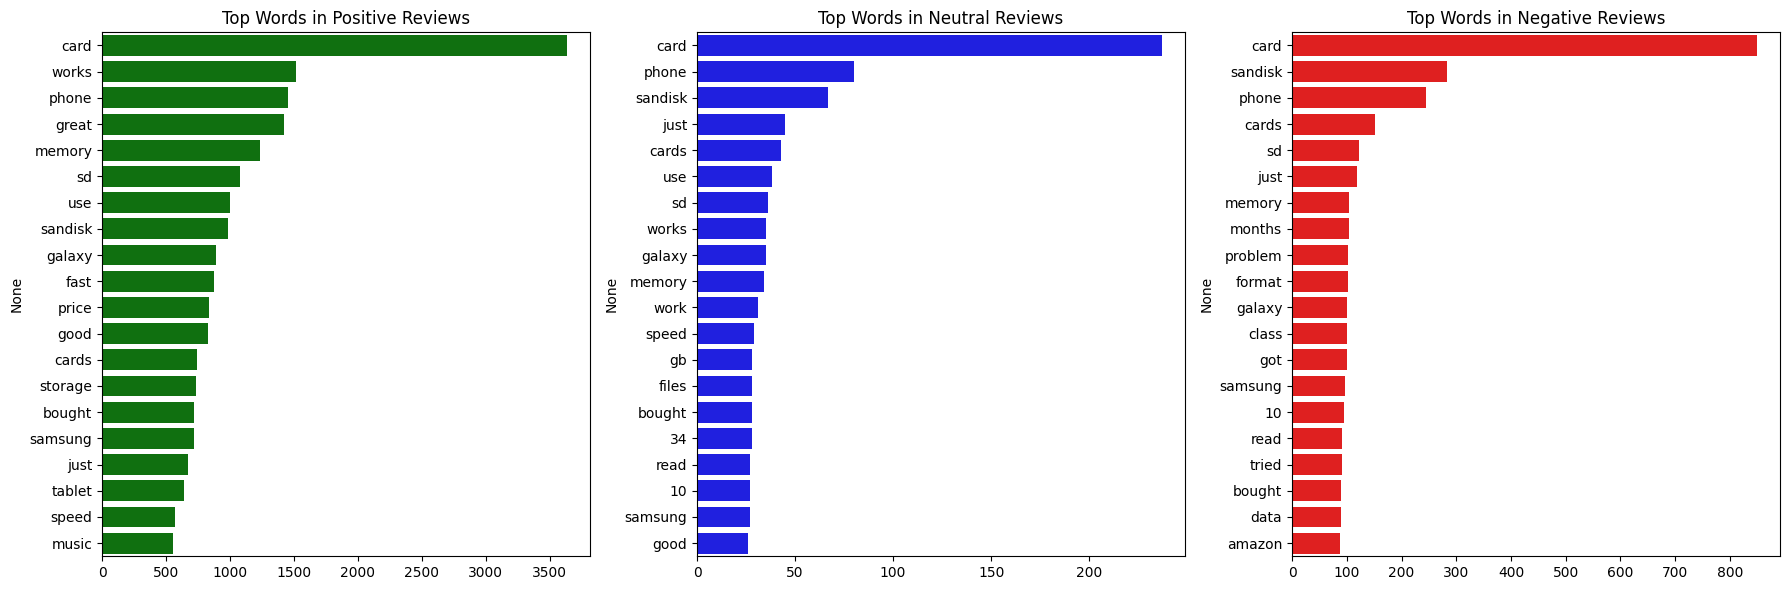

In [ ]:
# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x=top_words_positive.values, y=top_words_positive.index, ax=axes[0], color='green')
axes[0].set_title('Top Words in Positive Reviews')

sns.barplot(x=top_words_neutral.values, y=top_words_neutral.index, ax=axes[1], color='blue')
axes[1].set_title('Top Words in Neutral Reviews')

sns.barplot(x=top_words_negative.values, y=top_words_negative.index, ax=axes[2], color='red')
axes[2].set_title('Top Words in Negative Reviews')

plt.tight_layout()
plt.show()

In [ ]:
# 감정과 총 공감 수, 리뷰 길이와  상관계수

In [ ]:
temp2= data[['overall','score_pos_neg_diff','reviewLength']]
temp2

,overall,score_pos_neg_diff,reviewLength
0,4.0,0,10
1,5.0,0,158
2,4.0,0,166
3,5.0,0,340
4,5.0,0,290
...,...,...,...
4910,1.0,0,320
4911,5.0,0,148
4912,5.0,0,233
4913,5.0,0,91


In [ ]:
correlation_matrix = temp2.corr()

<Axes: >

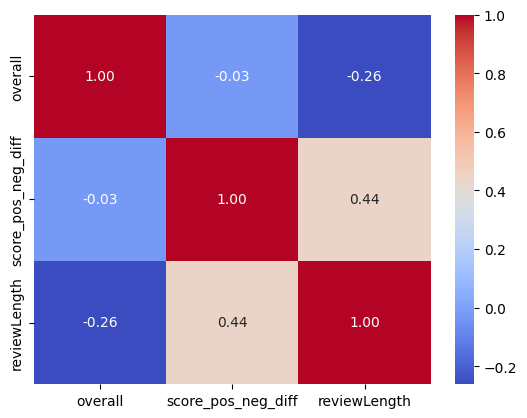

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
##############################3

<Axes: xlabel='overall'>

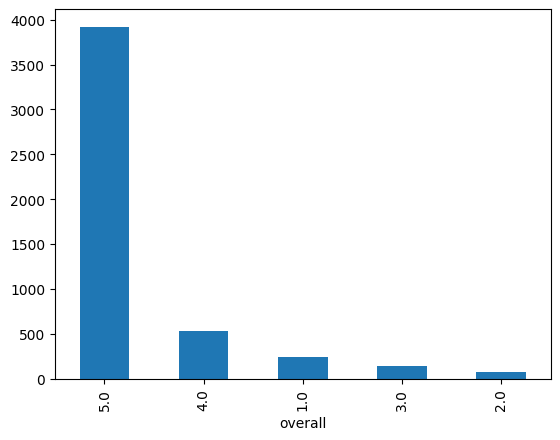

In [ ]:
# 점수 분포
data['overall'].value_counts().plot(kind='bar')

<Axes: >

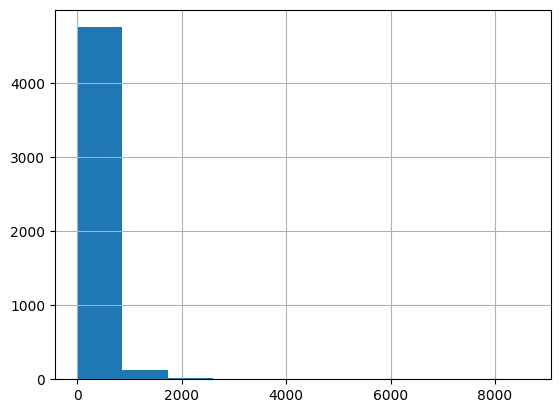

In [ ]:
#.str 문자열 관련 메소드 적용시킬 수 있도록
data['reviewText'].str.len().hist()

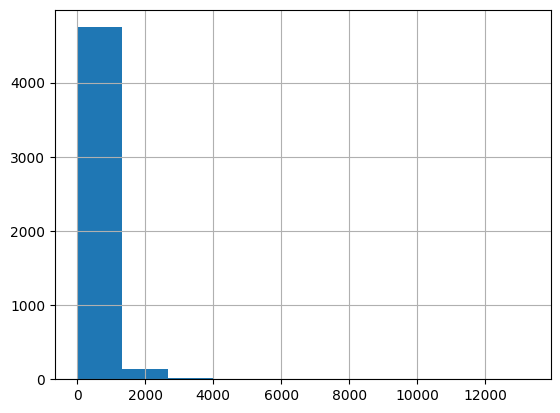

In [ ]:
# 단어 기준 단어 길이 분포
def plot_word_num_hist(text):
  x = text.str.split()
  if type(x) is not str:
    x = x.astype(str)
  x.map(lambda x: len(x)).hist()

plot_word_num_hist(data['reviewText'])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


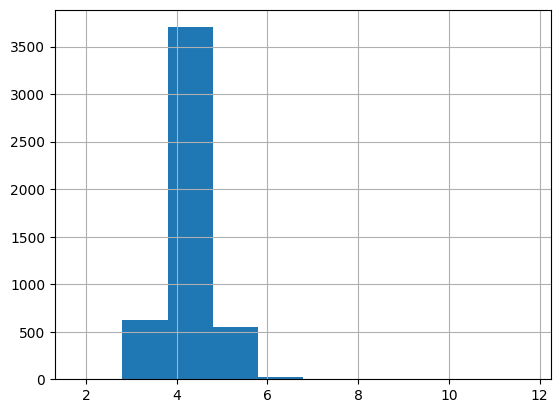

In [ ]:
# 리뷰의 평균 단어 길이

import numpy as np

def plot_word_len_hist(text):
  temp = text.str.split().fillna('')
  temp.map(lambda x: [len(i) if type(i) == str  else len(str(i)) for i in x]).map(lambda x:np.mean(x)).hist()


plot_word_len_hist(data['reviewText'])

In [ ]:
# stopword 분포

import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = set(stopwords.words('english'))
stop


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
# 단어 문자열 형태로만 이루어진 newdata list 생성
newdata = data['reviewText'].str.split().fillna('').map(lambda x: [str(i) if type(i) is not str else i for i in x])
newdata

,reviewText
0,"[No, issues.]"
1,"[Purchased, this, for, my, device,, it, worked..."
2,"[it, works, as, expected., I, should, have, sp..."
3,"[This, think, has, worked, out, great.Had, a, ..."
4,"[Bought, it, with, Retail, Packaging,, arrived..."
...,...
4910,"[I, bought, this, Sandisk, 16GB, Class, 10, to..."
4911,"[Used, this, for, extending, the, capabilities..."
4912,"[Great, card, that, is, very, fast, and, relia..."
4913,"[Good, amount, of, space, for, the, stuff, I, ..."


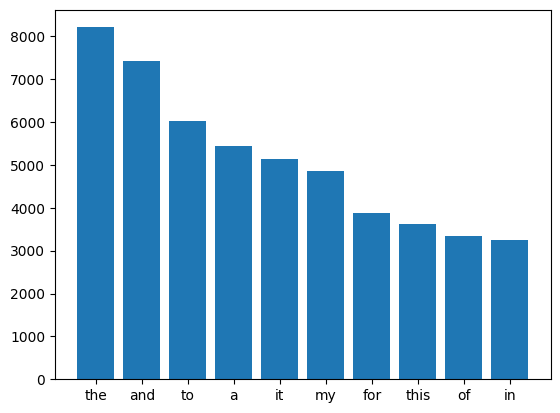

In [ ]:
# stopword 분포 확인

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    # 중첩 리스트
    new=text.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    # 새로운 키 추가될때 기본값 0을 자동 할당
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(newdata)


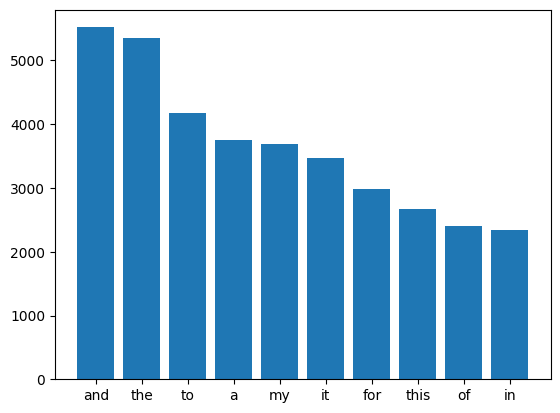

In [ ]:
# overall 점수가 5점일때 stopword 분포
newdata_5 = data.loc[data['overall']==5,'reviewText'].str.split().fillna('').map(lambda x: [str(i) if type(i) is not str else i for i in x])

# overall 점수가 1점일때 stopword 분포
newdata_1 = data.loc[data['overall']==1,'reviewText'].str.split().fillna('').map(lambda x: [str(i) if type(i) is not str else i for i in x])


plot_top_stopwords_barchart(newdata_5)

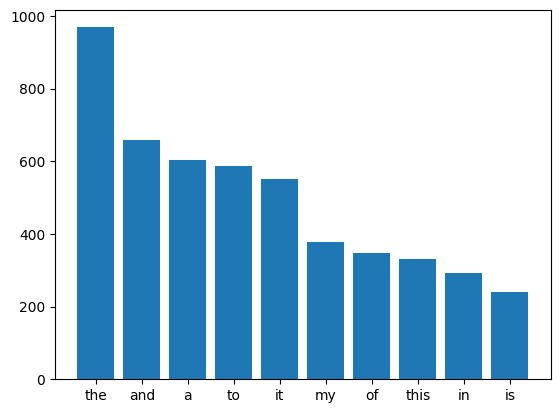

In [ ]:
plot_top_stopwords_barchart(newdata_1)

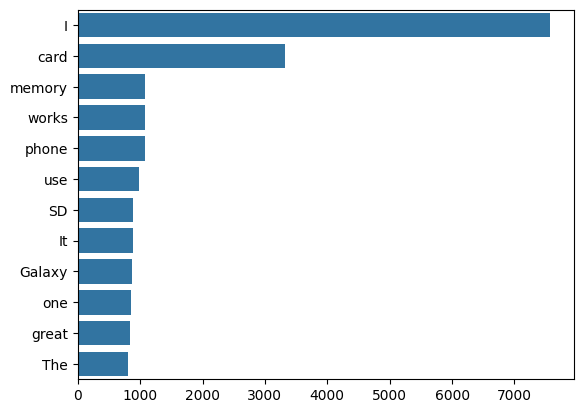

In [ ]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    corpus=[word for i in text for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(newdata)

In [ ]:
# 원 데이터 수정. 단어가 str형태이도록
newdata
print(newdata)


newdata = newdata.map(lambda x: " ".join(x))
newdata

data['new_reviewText'] = newdata


0                                           [No, issues.]
1       [Purchased, this, for, my, device,, it, worked...
2       [it, works, as, expected., I, should, have, sp...
3       [This, think, has, worked, out, great.Had, a, ...
4       [Bought, it, with, Retail, Packaging,, arrived...
                              ...                        
4910    [I, bought, this, Sandisk, 16GB, Class, 10, to...
4911    [Used, this, for, extending, the, capabilities...
4912    [Great, card, that, is, very, fast, and, relia...
4913    [Good, amount, of, space, for, the, stuff, I, ...
4914    [I've, heard, bad, things, about, this, 64gb, ...
Name: reviewText, Length: 4915, dtype: object


In [ ]:
data['new_reviewText']

,new_reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


['I', 'bought', '2', 'of', 'those', 'SanDisk', '32', 'GB', 'microSD', ',', 'used', 'them', 'on', 'my', 'Galaxy', 'Note', 'and', 'Galaxy', 'S4First', 'one', ',', 'my', 'phone', 'started', 'saying', 'it', 'was', 'removed', ',', 'then', 'recognize', 'it', 'again', ':)', 'then', 'diedI', 'thought', "it's", 'just', 'a', 'luck', ',', 'plugged', 'in', 'the', '2nd', 'one', ':)', 'stayed', 'for', 'about', '2', 'months', 'and', 'died', 'suddenly', '!', 'and', 'lost', 'everythingnever', 'buying', 'from', 'SanDisk', 'again', '..', 'ever', 'I', 'bougth', 'this', 'micro', 'SD', 'card', 'after', 'some', 'trubles', 'with', 'other', 'that', 'i', 'got', 'from', 'Kingston,', 'i', 'can', 'tell', 'that', 'SanDisk', 'is', 'other', 'quality,', 'this', 'is', 'the', 'best,', 'my', 'i9300', 'phone', 'can', 'read', 'a', '64GB', 'very', 'fast,', 'the', 'dta', 'transfer', 'speed', 'from', 'my', 'pc', 'to', 'my', 'is', 'amazing,', 'if', 'you', 'are', 'looking', 'for', 'additional', 'storage', 'to', 'you', 'phone,',

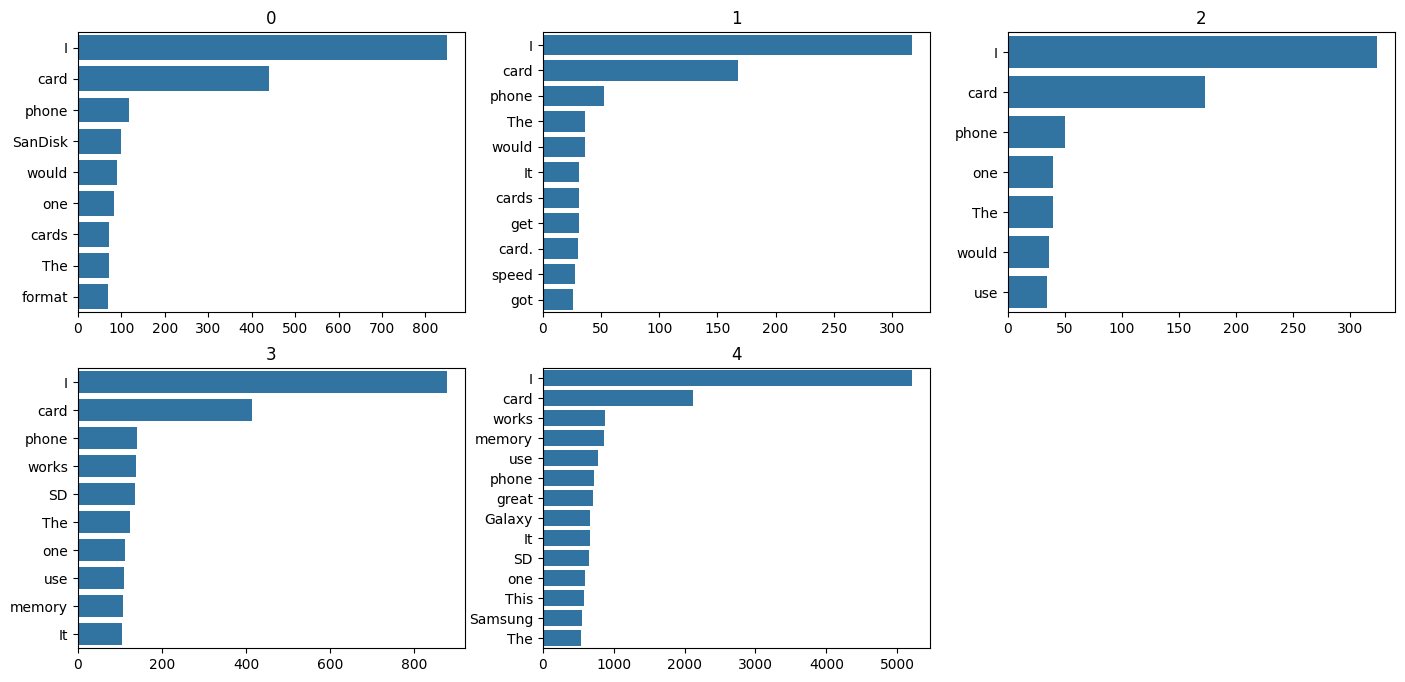

In [ ]:
# 많이 쓰이는 단어 count

fig = plt.figure(figsize=(17,8)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3

def plot_top_non_stopwords_barchart2(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    print(corpus)

    # counter: 요소 수를 세는 도구
    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    return x, y

for i in range(5):
    x,y = plot_top_non_stopwords_barchart2(data[data['overall']== i +1]['new_reviewText'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

# 감성분석 시작

In [ ]:
import pandas as pd
data = pd.read_csv('/content/amazon_reviews.csv')

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# 신뢰할 수 있는 긍정평가 0~1. 신뢰성 높이기 위해 0.3 이상을 대상으로 진행
data['wilson_lower_bound'].value_counts()

,count
wilson_lower_bound,
0.000000e+00,4496
2.065493e-01,266
9.453121e-02,46
3.423802e-01,28
6.149194e-02,9
4.385030e-01,7
4.868361e-17,6
5.101092e-01,5
5.655175e-01,5


In [ ]:
data_fin = data[data['wilson_lower_bound'] >= 0.3]
data_fin.columns


Index(['reviewerName', 'overall', 'reviewText', 'reviewTime', 'day_diff',
       'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [ ]:
review = data_fin[['reviewText','overall']]
review_df =pd.DataFrame(review)
review_df.reset_index(drop=True, inplace=True)
review_df

,reviewText,overall
0,**Update 6.24.14**My 128 GB card stopped allow...,5.0
1,I'm amazed. I ordered this from Amazon on Tue...,5.0
2,I bought the 64GB MicroSD card at Best Buy bec...,5.0
3,Update: providing an update with regard to San...,5.0
4,I purchased this and could not get it to work....,5.0
...,...,...
73,High speed class 10 memory works great in my n...,5.0
74,Sandisk announcement of the first 128GB micro ...,5.0
75,Bought this for Samsung Galaxy S3 in Fall 2012...,3.0
76,Died within 6 months! Stopped being able to re...,1.0


In [ ]:
for idx, i in enumerate(review_df['overall']):
  review_df['original_senti'] = review_df['overall'].map(
    lambda x: 'negative' if x in [1, 2] else ('positive' if x in [4, 5] else 'neutral')
)

In [ ]:
review_df['original_senti'].value_counts()

,count
original_senti,
positive,57
negative,16
neutral,5


# 감성점수 분석 - VADER

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()


for idx, i in enumerate (review_df['reviewText']):
  temp= senti_analyzer.polarity_scores(i)
  review_df.loc[idx,['neg','neu','pos','compound']] = temp['neg'], temp['neu'],temp['pos'],temp['compound']

In [ ]:
review_df.sort_values(by='compound', ascending=False)

,reviewText,overall,original_senti,neg,neu,pos,compound
64,NOTE: please read the last update (scroll to ...,1.0,negative,0.045,0.814,0.141,0.9994
35,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.0,positive,0.032,0.853,0.115,0.9980
51,I have tested dozens of SDHC and micro-SDHC ca...,5.0,positive,0.025,0.881,0.094,0.9910
74,Sandisk announcement of the first 128GB micro ...,5.0,positive,0.031,0.837,0.132,0.9872
54,The primary reason for buying this extra capac...,4.0,positive,0.018,0.895,0.087,0.9850
...,...,...,...,...,...,...,...
6,I purchased this memory card for use in a Gala...,5.0,positive,0.140,0.784,0.076,-0.7864
53,There is a known issue with a batch of these c...,3.0,neutral,0.106,0.860,0.034,-0.7874
52,Thank God for amazon return policy or I would ...,1.0,negative,0.102,0.832,0.066,-0.8133
76,Died within 6 months! Stopped being able to re...,1.0,negative,0.363,0.566,0.071,-0.8687


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewText      78 non-null     object 
 1   overall         78 non-null     float64
 2   original_senti  78 non-null     object 
 3   neg             78 non-null     float64
 4   neu             78 non-null     float64
 5   pos             78 non-null     float64
 6   compound        78 non-null     float64
dtypes: float64(5), object(2)
memory usage: 4.4+ KB


In [ ]:
for idx, i in enumerate(review_df['compound']):
  if i >= 0.1:
    review_df.loc[idx, 'senti'] = 'positive'
  elif i <= -0.1:
    review_df.loc[idx, 'senti'] = 'negative'
  else:
    review_df.loc[idx, 'senti'] = 'neutral'


In [ ]:
# VADER 기준 분리 > 대체로 잘 분리됨
review_df.groupby('original_senti')['senti'].value_counts()

original_senti  senti   
negative        positive     9
                negative     7
neutral         positive     3
                negative     2
positive        positive    48
                negative     7
                neutral      2
Name: count, dtype: int64

In [ ]:
# 교차표
import pandas as pd

conf_matrix = pd.crosstab(review_df['original_senti'], review_df['senti'],
                          rownames=['Actual (Overall)'], colnames=['Predicted (VADER)'])
conf_matrix

Predicted (VADER),negative,neutral,positive
Actual (Overall),,,
negative,7,0,9
neutral,2,0,3
positive,7,2,48


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

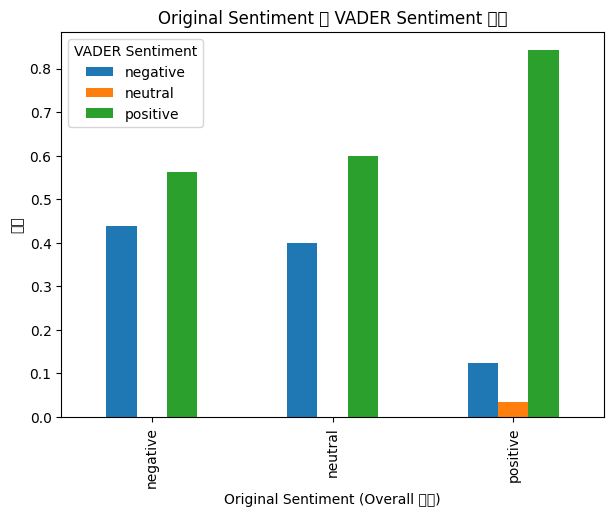

In [ ]:
import matplotlib.pyplot as plt

# original_senti별로 senti 분포 비율
dist = pd.crosstab(review_df['original_senti'], review_df['senti'], normalize='index')

dist.plot(kind='bar', stacked=False, figsize=(7,5))
plt.title('Original Sentiment 별 VADER Sentiment 분포')
plt.ylabel('비율')
plt.xlabel('Original Sentiment (Overall 기준)')
plt.legend(title='VADER Sentiment')
plt.show()


# Logistic

In [ ]:
data = pd.read_csv('/content/amazon_reviews.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [ ]:
# 신뢰성 있는 데이터만 남기기
data_review = data[data['wilson_lower_bound'] >= 0.3]
data_review.reset_index(inplace=True)

In [ ]:
data_review

,index,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,76,A.Fenderson,5.0,**Update 6.24.14**My 128 GB card stopped allow...,2013-04-24,593,3,0,3,3,1.000000,0.438503
1,93,Airedad,5.0,I'm amazed. I ordered this from Amazon on Tue...,2012-07-25,866,15,6,21,9,0.714286,0.500436
2,95,ajb,5.0,I bought the 64GB MicroSD card at Best Buy bec...,2013-03-25,623,4,0,4,4,1.000000,0.510109
3,121,A. Lee,5.0,Update: providing an update with regard to San...,2012-05-09,943,5,0,5,5,1.000000,0.565518
4,183,"Amazon Customer ""followup""",5.0,I purchased this and could not get it to work....,2013-11-20,383,2,0,2,2,1.000000,0.342380
...,...,...,...,...,...,...,...,...,...,...,...,...
73,4659,TucsonShopper,5.0,High speed class 10 memory works great in my n...,2012-11-23,745,3,0,3,3,1.000000,0.438503
74,4672,Twister,5.0,Sandisk announcement of the first 128GB micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109
75,4727,villapoo,3.0,Bought this for Samsung Galaxy S3 in Fall 2012...,2013-05-13,574,2,0,2,2,1.000000,0.342380
76,4849,W. Paul Lothary,1.0,Died within 6 months! Stopped being able to re...,2014-01-28,314,2,0,2,2,1.000000,0.342380


In [ ]:
# 긍/부정 이진 분류만 할 예정
for idx, i in enumerate(data_review['overall']):
  if i in [1, 2]:
    data_review.loc[idx, 'original_senti'] = 0
  elif i in [4,5]:
    data_review.loc[idx, 'original_senti'] = 1
  else:
    data_review.loc[idx, 'original_senti'] = 'neu'
data_review['original_senti'].unique()

/tmp/ipython-input-64-229735759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_review.loc[idx, 'original_senti'] = 1
/tmp/ipython-input-64-229735759.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'neu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_review.loc[idx, 'original_senti'] = 'neu'


array([1.0, 0.0, 'neu'], dtype=object)

In [ ]:
data_review = data_review[ data_review['original_senti'].isin([0, 1])]
data_review.reset_index(drop=True, inplace=True)

data_review['original_senti'].unique()

data_review['original_senti'].value_counts()

,count
original_senti,
1.0,57
0.0,16


In [ ]:
data_review

,index,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,original_senti
0,76,A.Fenderson,5.0,**Update 6.24.14**My 128 GB card stopped allow...,2013-04-24,593,3,0,3,3,1.000000,0.438503,1.0
1,93,Airedad,5.0,I'm amazed. I ordered this from Amazon on Tue...,2012-07-25,866,15,6,21,9,0.714286,0.500436,1.0
2,95,ajb,5.0,I bought the 64GB MicroSD card at Best Buy bec...,2013-03-25,623,4,0,4,4,1.000000,0.510109,1.0
3,121,A. Lee,5.0,Update: providing an update with regard to San...,2012-05-09,943,5,0,5,5,1.000000,0.565518,1.0
4,183,"Amazon Customer ""followup""",5.0,I purchased this and could not get it to work....,2013-11-20,383,2,0,2,2,1.000000,0.342380,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,4596,"Tom Henriksen ""Doggy Diner""",1.0,Hi:I ordered two card and they arrived the nex...,2012-09-22,807,82,27,109,55,0.752294,0.663595,0
69,4659,TucsonShopper,5.0,High speed class 10 memory works great in my n...,2012-11-23,745,3,0,3,3,1.000000,0.438503,1
70,4672,Twister,5.0,Sandisk announcement of the first 128GB micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109,1
71,4849,W. Paul Lothary,1.0,Died within 6 months! Stopped being able to re...,2014-01-28,314,2,0,2,2,1.000000,0.342380,0


In [ ]:
fin_data = data_review[['reviewText', 'original_senti']]

fin_data['original_senti'] =fin_data['original_senti'].astype(int)
fin_data['original_senti'].value_counts()
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewText      73 non-null     object
 1   original_senti  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


/tmp/ipython-input-67-2631696786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_data['original_senti'] =fin_data['original_senti'].astype(int)


In [ ]:
fin_data['reviewText'][0]

'**Update 6.24.14**My 128 GB card stopped allowing writes via any of my card-readers on a Windows PC--either when it was inside any of several full-size SD card adapters (with the write-protect tab in either position) or plugged directly into the microSD slot of the reader.  MicroSD cards have no write-protect tab, so I was quite surprised and worried by this.  After failing to find any workable solution by searching online, I finally put it in my Chromebook and created a new folder on it there, then stuck it back in my Windows PC and it no longer gave me a write-protect error.  If anyone has a similar problem, I\'d recommend doing something similar by putting it in any other PC, laptop, camera, etc you have available and try writing to it there.----------------------------------------------This portion of my review is necessarily being written as an update to my original review of the 64 GB version of this card, since Amazon disallows multiple reviews for what they consider the same i

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = fin_data['reviewText']
y = fin_data['original_senti']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# TF-IDF 벡터화

idf_vec = TfidfVectorizer(stop_words='english')
X_train_idf = idf_vec.fit_transform(X_train)
X_test_idf = idf_vec.transform(X_test)

# SMOTE 적용 (훈련 데이터에만!)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_idf, y_train)



In [ ]:
# 모델 최적화
!pip install hyperopt
import hyperopt

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np


space = {
    'C': hp.loguniform('C', np.log(1e-3), np.log(10)),  # C 값을 로그스케일로 탐색
    'penalty': hp.choice('penalty', ['l2']),
    'solver': hp.choice('solver', ['liblinear', 'saga'])
}

# 목적 함수 정의
def objective(params):
    model = LogisticRegression(
        C=params['C'],
        penalty=params['penalty'],
        solver=params['solver'],
        max_iter=1000,
        random_state=42
    )
    score = cross_val_score(model, X_train_res, y_train_res, cv=3, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}  # HyperOpt는 loss를 최소화하므로 음수로

# Trial 객체 생성
trials = Trials()

# 최적화 실행
best = fmin(
    fn=objective,
    space=space,
    max_evals=20,
    trials=trials,
)

# 결과 출력
print("\n최적의 하이퍼파라미터:")
print(best)

100%|██████████| 20/20 [00:01<00:00, 14.51trial/s, best loss: -0.9666666666666667]

최적의 하이퍼파라미터:
{'C': np.float64(9.873829816089202), 'penalty': np.int64(0), 'solver': np.int64(1)}


In [ ]:
# 6. 예측 및 평가

fin_model = LogisticRegression(C= np.float64(9.873829816089202), penalty= 'l2',solver= 'saga')
y_pred = model.predict(X_test_idf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.80      1.00      0.89        12

    accuracy                           0.80        15
   macro avg       0.40      0.50      0.44        15
weighted avg       0.64      0.80      0.71        15



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


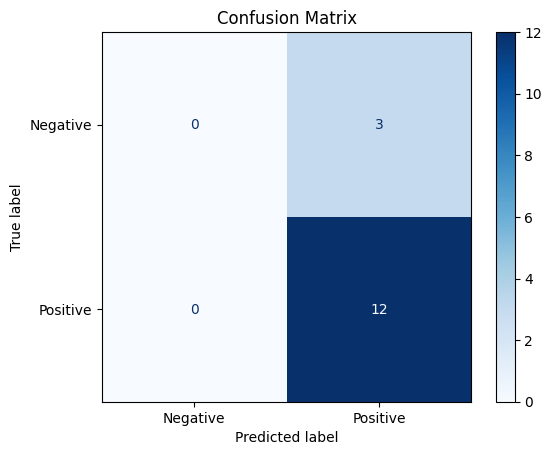

In [ ]:
# 결과 확인

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

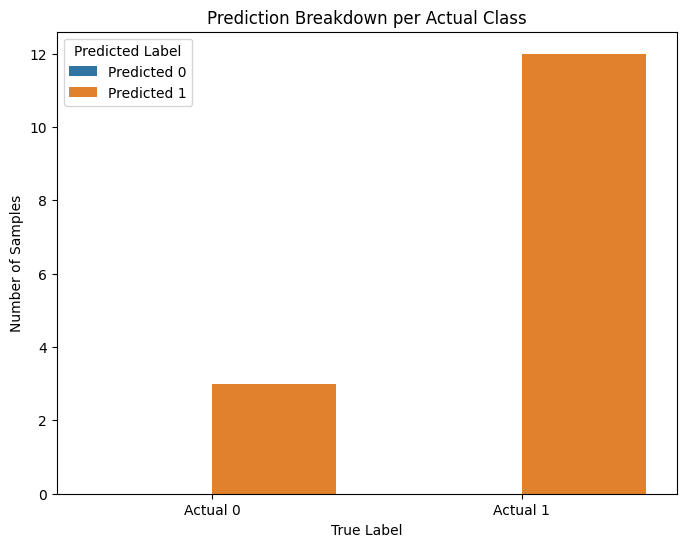

In [ ]:
import seaborn as sns

# 행: 실제 값, 열: 예측 값
# df 형태로 바꾸기
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# 막대그래프용 데이터 변환
cm_melted = cm_df.reset_index().melt(id_vars='index')
cm_melted.columns = ['Actual', 'Predicted', 'Count']

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=cm_melted, x='Actual', y='count', hue='Predicted')
plt.title('Result')
plt.ylabel('Number of Samples')
plt.xlabel('True Label')
plt.legend(title='Predicted Label')
plt.show()

#허깅페이스 모델

In [ ]:
import pandas as pd
data = pd.read_csv('amazon_reviews.csv')

data.drop(columns=['Unnamed: 0'], inplace=True)
review = data[['reviewText','overall']]

review.dropna(inplace =True)

/tmp/ipython-input-12-2161119445.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review.dropna(inplace =True)


In [ ]:
# overall 점수를 기반으로 긍정/중립/부정 리뷰 나누기
review['senti'] = review['overall'].map(lambda x: 'neg' if x in [1, 2] else ('pos' if x in [4, 5] else 'neu'))

# 리뷰 확인
pd.set_option('display.max_colwidth', None)
review.loc[review['senti'] == 'pos']


/tmp/ipython-input-27-2103680181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['senti'] = review['overall'].map(lambda x: 'neg' if x in [1, 2] else ('pos' if x in [4, 5] else 'neu'))


,reviewText,overall,senti
0,No issues.,4.0,pos
1,"Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.",5.0,pos
2,it works as expected. I should have sprung for the higher capacity. I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before,4.0,pos
3,"This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!",5.0,pos
4,"Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card",5.0,pos
...,...,...,...
4909,I bought this to stretch the capability of my LG GPad 8.3 GPE tablet.It is working just fine and of course I have total confidence in SanDisk storage items.,5.0,pos
4911,Used this for extending the capabilities of my Samsung Galaxy Note 10. It greatly expands it use and was a snap to install and get started with it.,5.0,pos
4912,Great card that is very fast and reliable. It comes with an optional adapter for SD slots. Being that this is a Class 10 card it transfers data really fast and for video this is a must! Great for GoPros and other small cameras alike.,5.0,pos
4913,"Good amount of space for the stuff I want to do, and fits in my GoPro. What more can I say?",5.0,pos


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
from scipy.special import softmax

# roberta 기반 모델
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"

# 토크나이저와 모델 불러오기
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# 토큰수 512 제한 = 텍스트를 512 토큰씩 잘라 저장
def split_text(text, max_length=512):
    # 토큰화
    tokens = tokenizer.tokenize(text)
    chunks = []
    for i in range(0, len(tokens), max_length):
        chunk_tokens = tokens[i:i+max_length]
        chunk_text = tokenizer.convert_tokens_to_string(chunk_tokens)
        chunks.append(chunk_text)
    return chunks

In [ ]:
# 나눈 청크에 대해 모델 예측하고 평균내는 함수
def predict_sentiment(text):
    chunks = split_text(text)
    probs_all = []
    for chunk in chunks:
        inputs = tokenizer(chunk, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        logits = outputs.logits[0].numpy()
        # 각각에 대해 0~1의 확률로
        probs = softmax(logits)
        probs_all.append(probs)
    avg_probs = np.mean(probs_all, axis=0)
    label_idx = np.argmax(avg_probs)
    labels = ['neg', 'neu', 'pos']
    return labels[label_idx], float(avg_probs[label_idx])

In [ ]:
# 모델 돌리기
review[['label', 'score']] = review['reviewText'].apply(lambda x: pd.Series(predict_sentiment(x)))

review

/tmp/ipython-input-40-1433552891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review[['label', 'score']] = review['reviewText'].apply(lambda x: pd.Series(predict_sentiment(x)))


,reviewText,overall,senti,label,score
0,No issues.,4.0,pos,neu,0.623615
1,"Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.",5.0,pos,pos,0.906580
2,it works as expected. I should have sprung for the higher capacity. I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before,4.0,pos,neu,0.521455
3,"This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!",5.0,pos,pos,0.934475
4,"Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card",5.0,pos,pos,0.887852
...,...,...,...,...,...
4910,"I bought this Sandisk 16GB Class 10 to use with my HTC Inspire, after 3 months, I am getting constant error saying SD Card unmounted unexpectedly.Then today, the dang fkang card won't even read in the card reader, I have 10GB worth of videos and pictures, memories that I will never be able to get back. I am very upset.",1.0,neg,neg,0.878705
4911,Used this for extending the capabilities of my Samsung Galaxy Note 10. It greatly expands it use and was a snap to install and get started with it.,5.0,pos,pos,0.961118
4912,Great card that is very fast and reliable. It comes with an optional adapter for SD slots. Being that this is a Class 10 card it transfers data really fast and for video this is a must! Great for GoPros and other small cameras alike.,5.0,pos,pos,0.980596
4913,"Good amount of space for the stuff I want to do, and fits in my GoPro. What more can I say?",5.0,pos,pos,0.947080


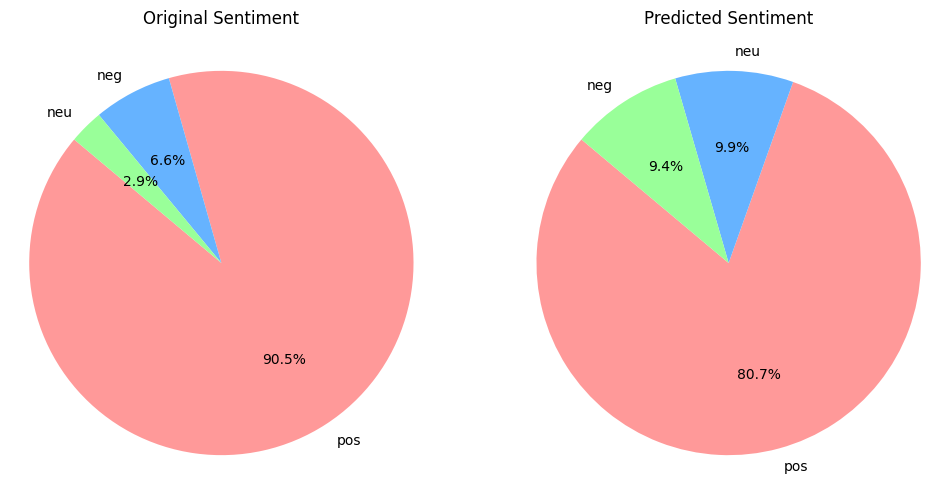

In [ ]:
# 원 모델 감정 분류 / 허깅페이스 모델 감정 분류

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 원본 감정 분포
counts_orig = review['senti'].value_counts()
axes[0].pie(counts_orig, labels=counts_orig.index, autopct='%1.1f%%', startangle=140,
            colors=['#ff9999','#66b3ff','#99ff99'])
axes[0].set_title('Original Sentiment')

# 모델 예측 감정 분포
counts_pred = review['label'].value_counts()
axes[1].pie(counts_pred, labels=counts_pred.index, autopct='%1.1f%%', startangle=140,
            colors=['#ff9999','#66b3ff','#99ff99'])
axes[1].set_title('Predicted Sentiment')

for ax in axes:
    ax.axis('equal')  # 원형 유지

plt.show()

Accuracy: 0.85


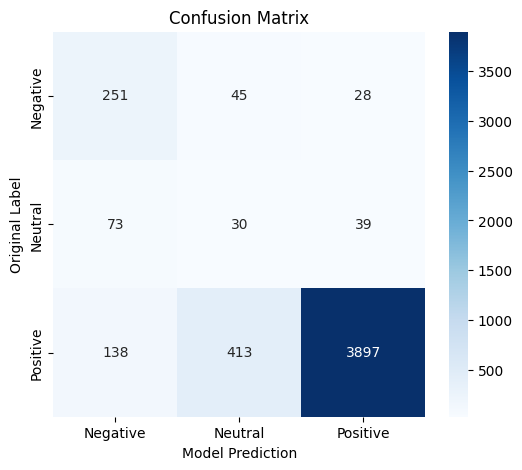

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 차이 비교 시각화
# 정확도 (원본과 모델 예측 일치 비율)
acc = accuracy_score(review['senti'], review['label'])
print(f"Accuracy: {acc:.2f}")

# 혼동 행렬 생성
cm = confusion_matrix(review['senti'], review['label'], labels=['neg','neu','pos'])

# 시각화
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative','Neutral','Positive'], yticklabels=['Negative','Neutral','Positive'], cmap='Blues')
plt.xlabel('Model Prediction')
plt.ylabel('Original Label')
plt.title('Confusion Matrix')
plt.show()